# MMA - Lab 1 Analysis of Univariate Random Variables

**Dataset = Credit Card Fraud Dataset**

by 
Vladimir Kazakovetsov &
Ashish Tara Shivakumar Ireddy 
J4132c 



In [11]:
#Importing Required Libraries

import warnings
import matplotlib
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import scipy.stats as st
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats._continuous_distns import _distn_names
warnings.filterwarnings("ignore")

In [ ]:
raw_data = pd.read_csv('../Credit Card Fraud Dataset/fraudTrain.csv', index_col=0)

- transdatetrans_time - Transaction DateTime
- cc_num - Credit Card Number of Customer
- merchant - Merchant Name
- category - Category of Merchant
- amt - Amount of Transaction
- first - First Name of Credit Card Holder
- last - Last Name of Credit Card Holder
- gender - Gender of Credit Card Holder
- street - Street Address of Credit Card Holder
- city - City of Credit Card Holder
- state - State of Credit Card Holder
- zip - Zip of Credit Card Holder
- lat - Latitude Location of Credit Card Holder
- long - Longitude Location of Credit Card Holder
- city_pop - Credit Card Holder's City Population
- job - Job of Credit Card Holder
- dob - Date of Birth of Credit Card Holder
- trans_num - Transaction Number
- unix_time - UNIX Time of transaction
- merch_lat - Latitude Location of Merchant
- merch_long - Longitude Location of Merchant
- is_fraud - Fraud Flag <--- Target Class

In [ ]:
raw_data.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
#Number of Frauds vs Legitimate Transactions
raw_data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

# Preprocessing of Data

In [4]:
import os
if 'preprocessed_data.csv' in os.listdir('../'):
    df = pd.read_csv('../preprocessed_data.csv')
else:
    df = raw_data.copy()
    df['trans_date_trans_time'] = raw_data['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x))
    df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.hour*60+x.minute)
    df['year_of_birth'] =  df['dob'].apply(lambda x: pd.to_datetime(x).year)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,minute,year_of_birth
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1988
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1978
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1962
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1967
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,1986


In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['date_of_birth_numeric'] = df['dob'].astype(int) / 10**9

# Looking at the data

# Step 1

- City population
- Amount of transaction
- Date of birth
- Lattitude of holder
- Lattitude of merchant

# Step 2
You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

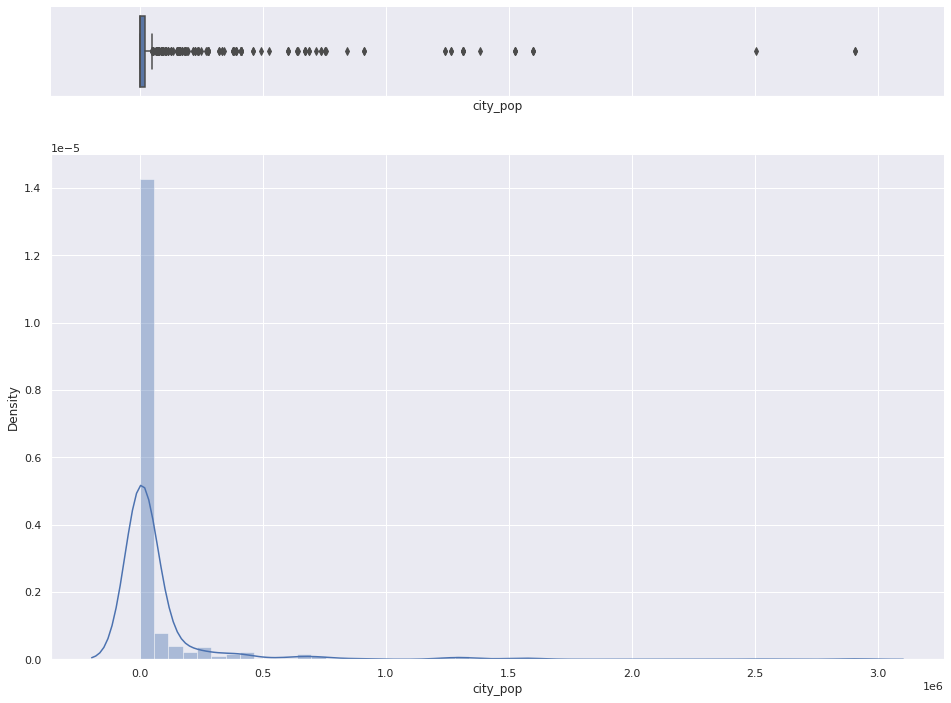

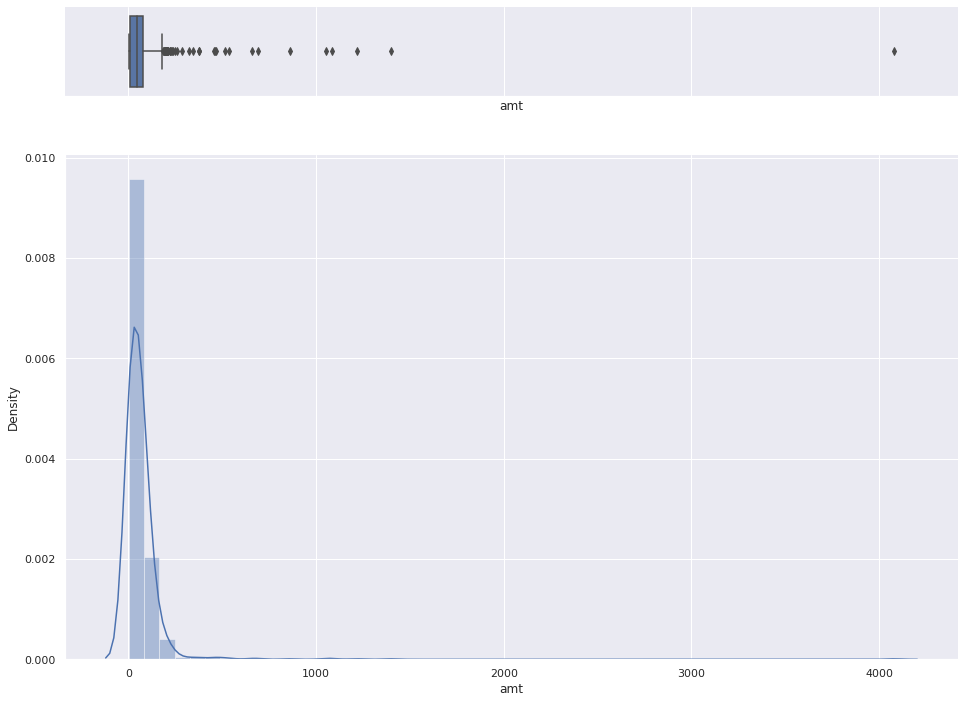

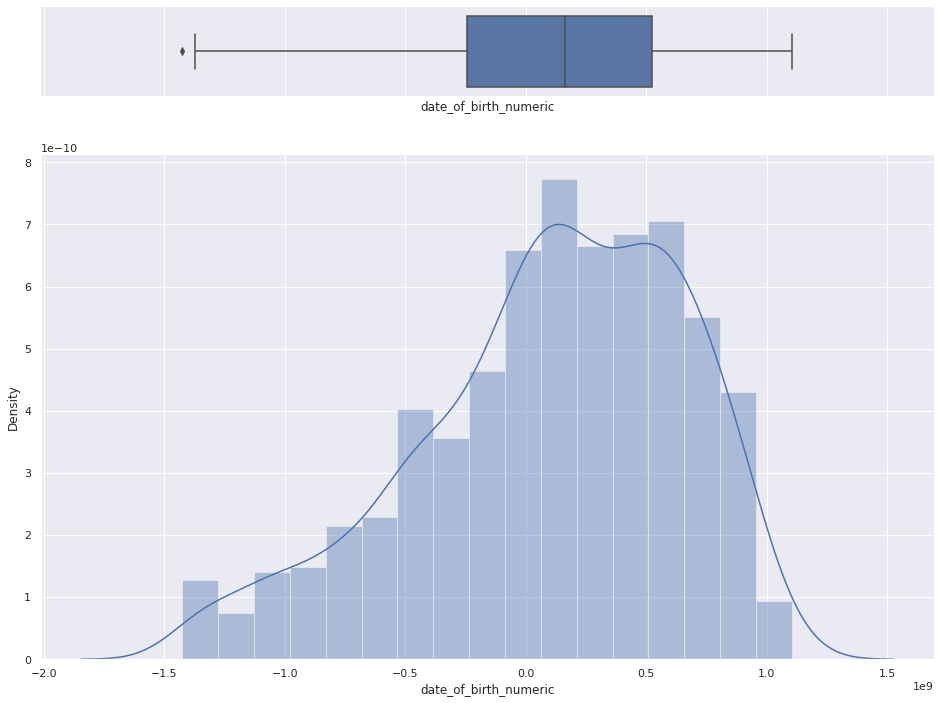

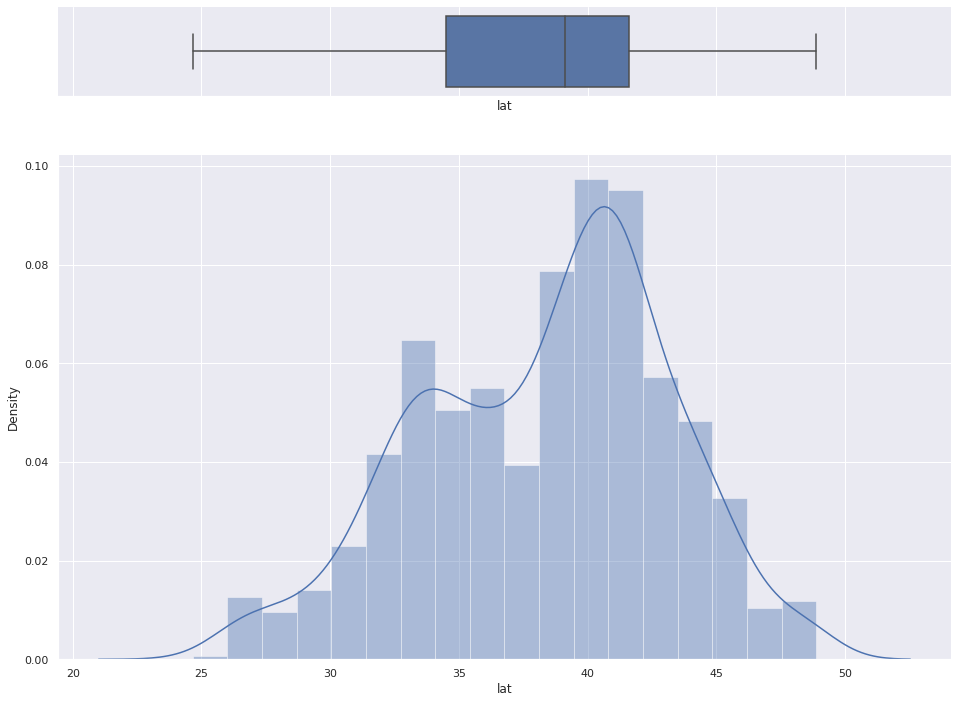

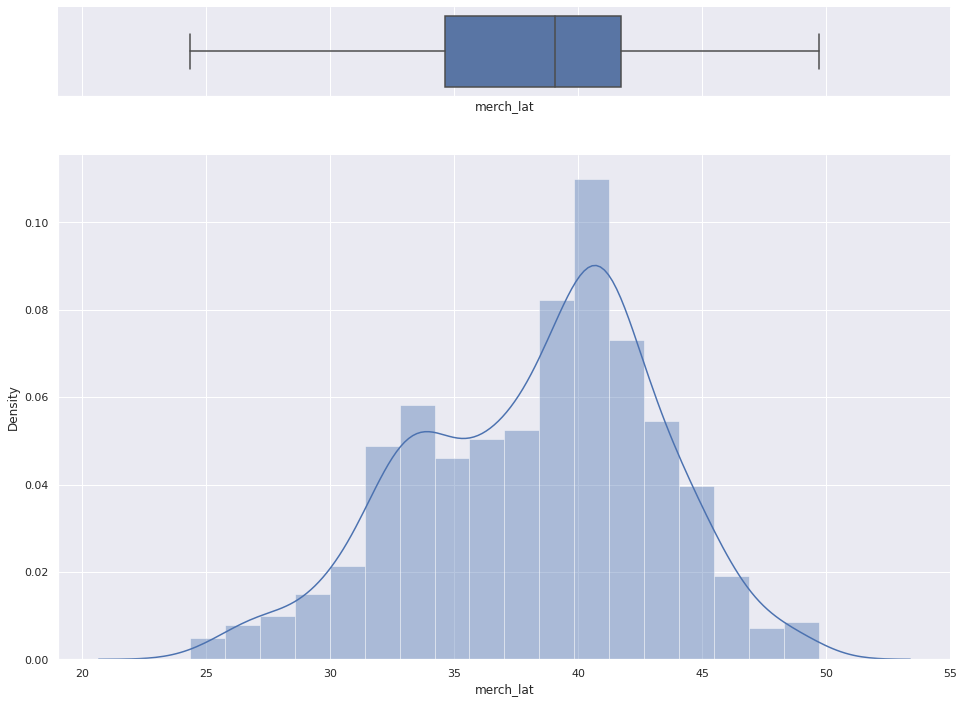

In [65]:
sns.set()
data = df.dropna().sample(1000)
cols = ['city_pop', 'amt', 'date_of_birth_numeric', 'lat', 'merch_lat']
for col in cols:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data[col], ax=ax_box)
    sns.distplot(data[col], ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

Since we have a lot of outliers we will use percentilles to clear dataset

(692, 26)


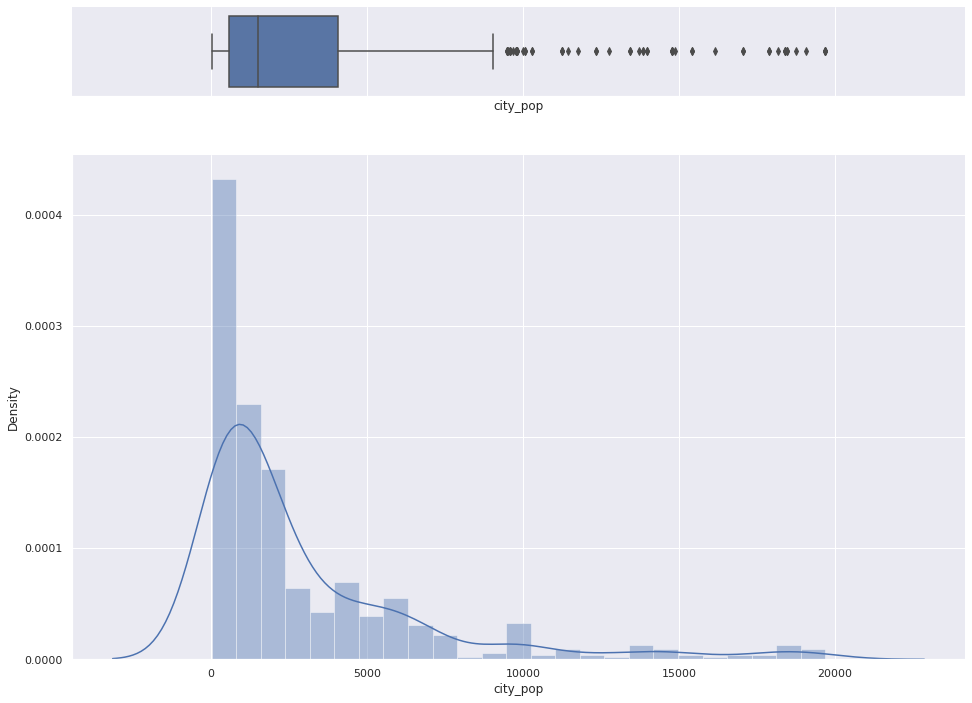

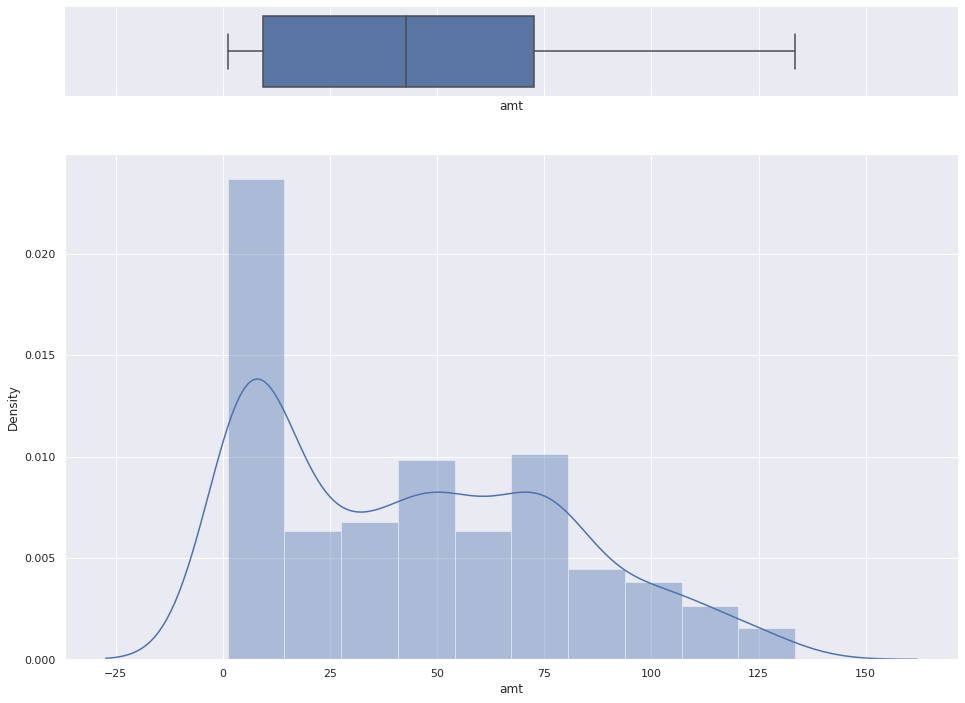

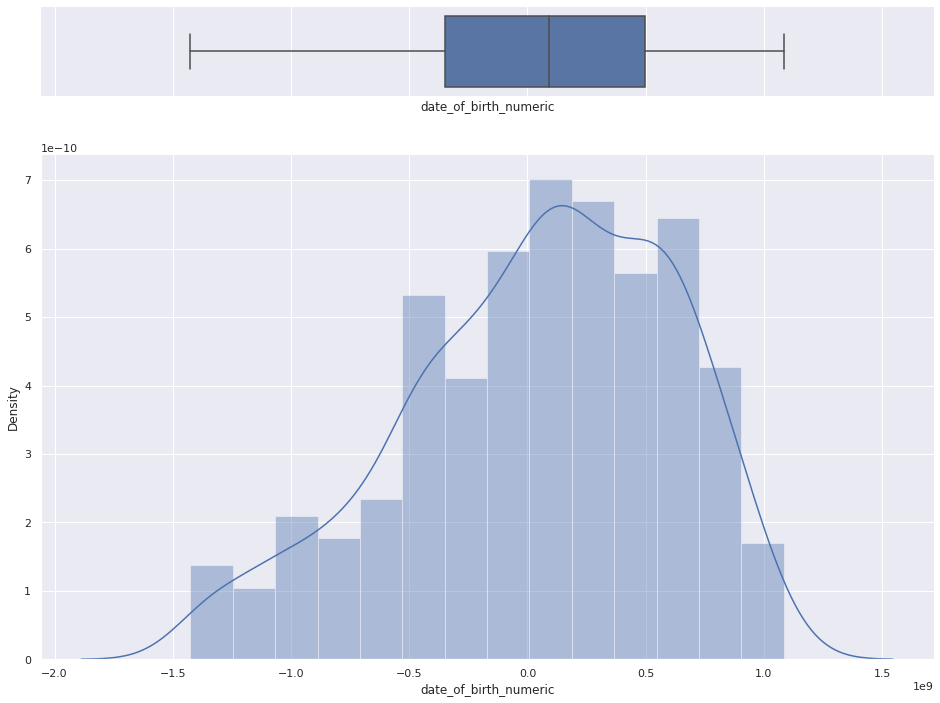

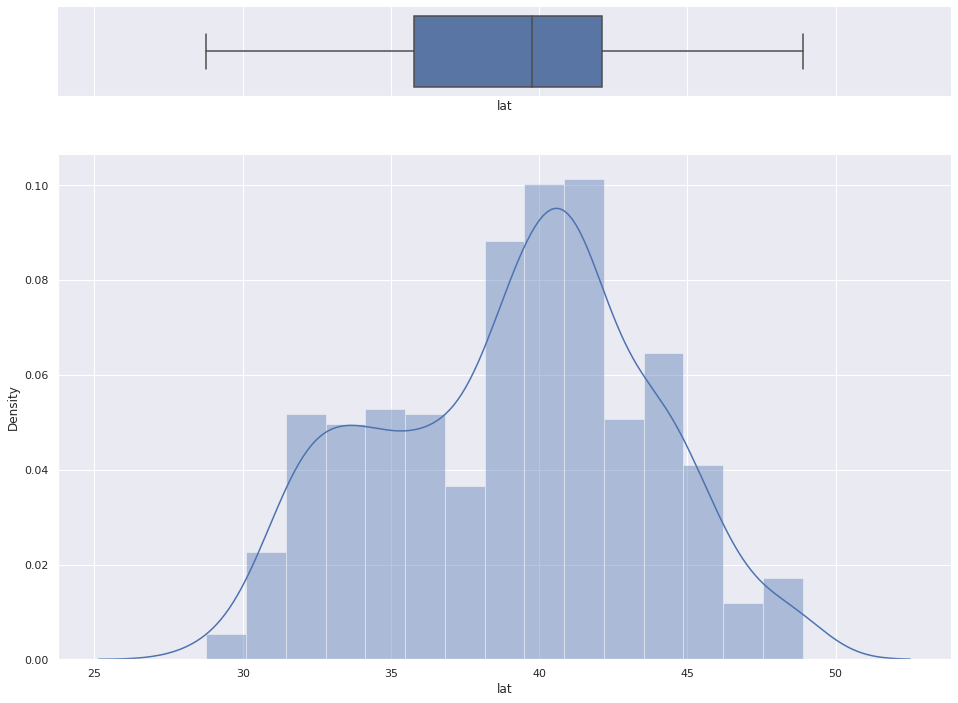

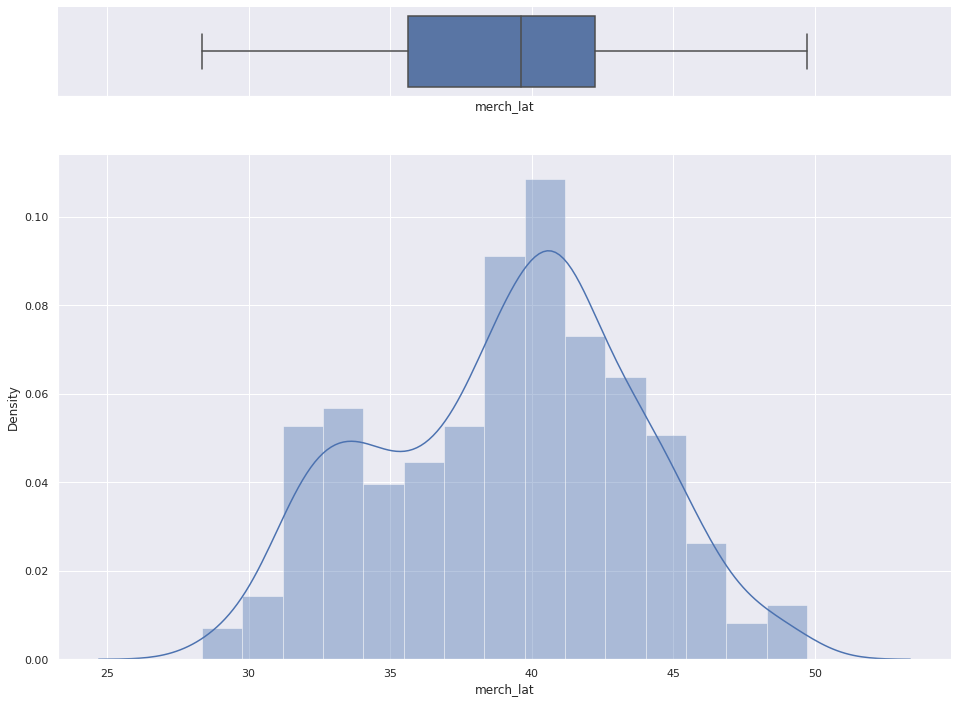

In [66]:
subsamples = data.copy()
subsamples['city_pop'] = subsamples[subsamples['city_pop']<np.percentile(subsamples['city_pop'], 75)]['city_pop']
subsamples['amt'] = subsamples[subsamples['amt']<np.percentile(subsamples['amt'], 92)]['amt']

subsamples = subsamples.dropna()
print(subsamples.shape)

cols = ['city_pop', 'amt', 'date_of_birth_numeric', 'lat', 'merch_lat']
for col in cols:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(subsamples[col], ax=ax_box)
    sns.distplot(subsamples[col], ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

Updated Data

In [67]:
subsamples.to_csv('subsamples_lab_1.csv')

# Step 3

You need to make an estimation of order statistics and represent them as “box with
whiskers” plot.

<AxesSubplot:xlabel='city_pop'>

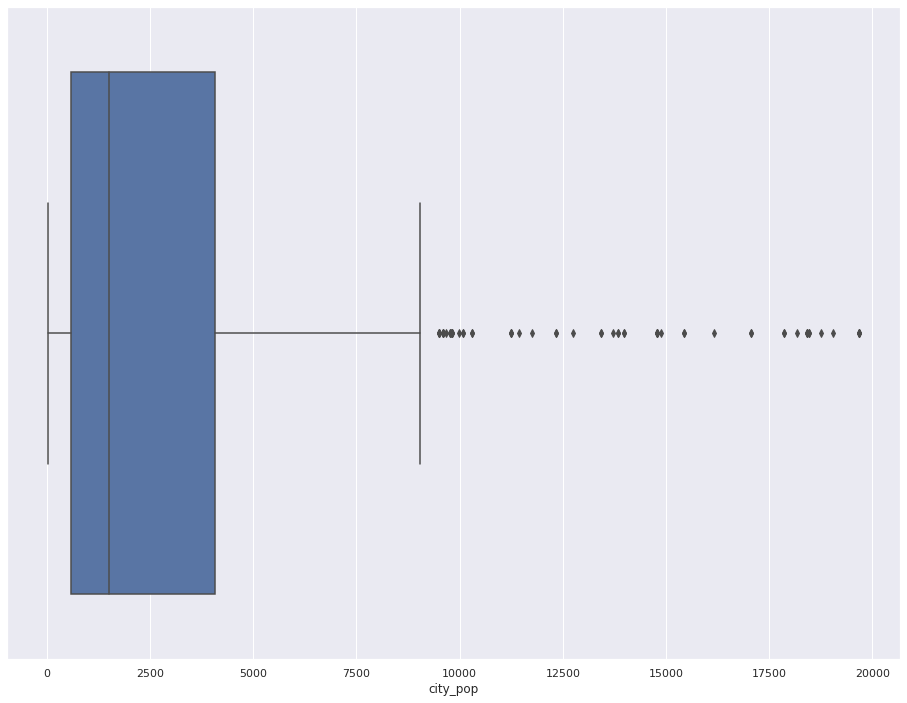

In [68]:
col = 'city_pop'
# sns.displot(raw_data[col])
# raw_data[col].hist()
sns.boxplot(subsamples[col])

<AxesSubplot:xlabel='amt'>

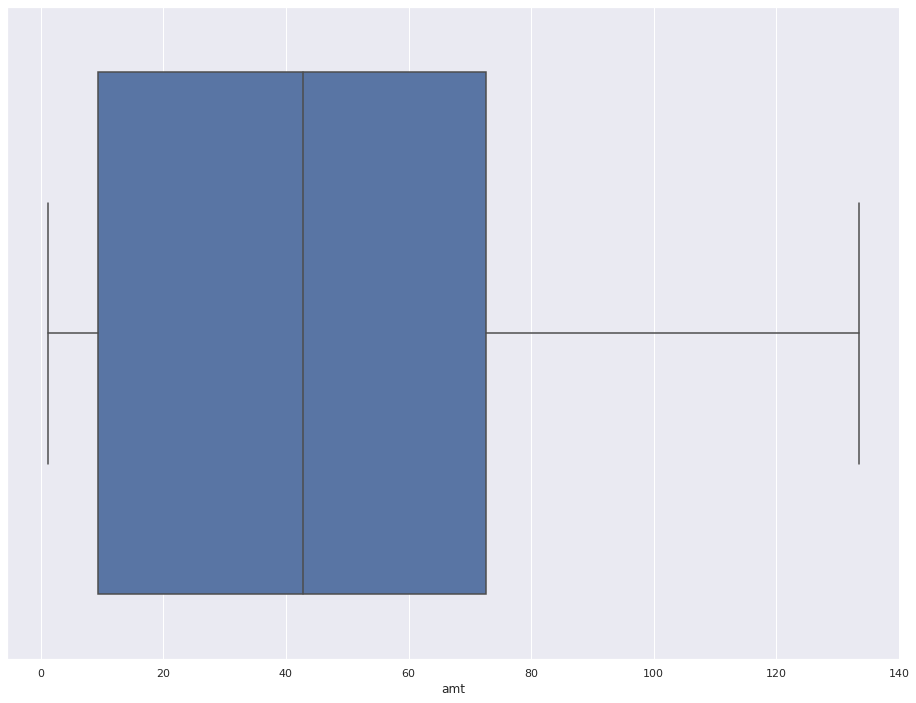

In [69]:
col = 'amt'

sns.boxplot(subsamples[col])


<AxesSubplot:xlabel='year_of_birth'>

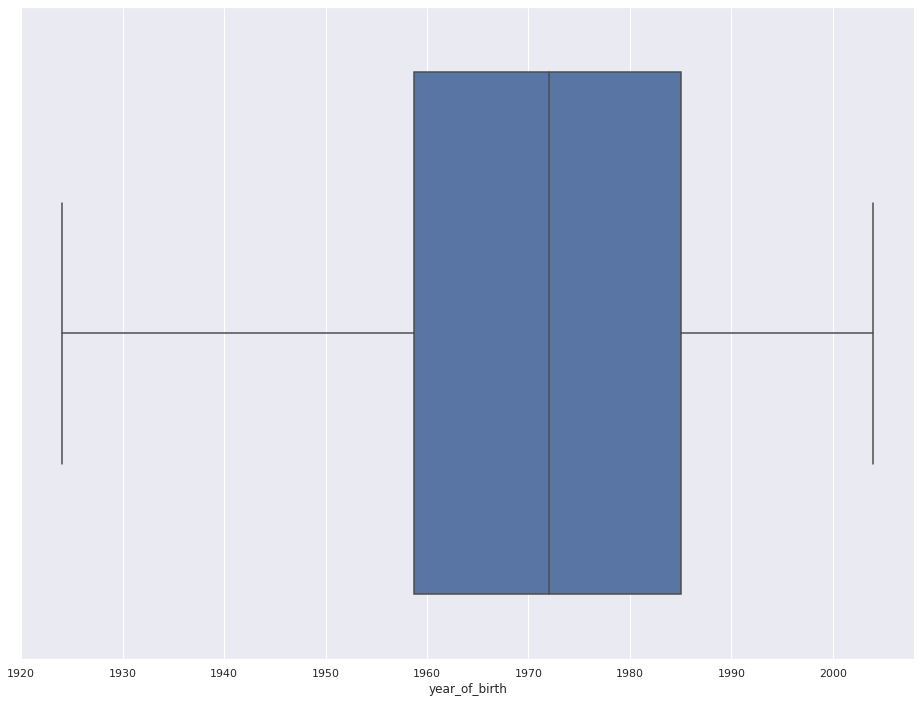

In [70]:
col = 'year_of_birth'

sns.boxplot(subsamples[col])


<AxesSubplot:xlabel='lat'>

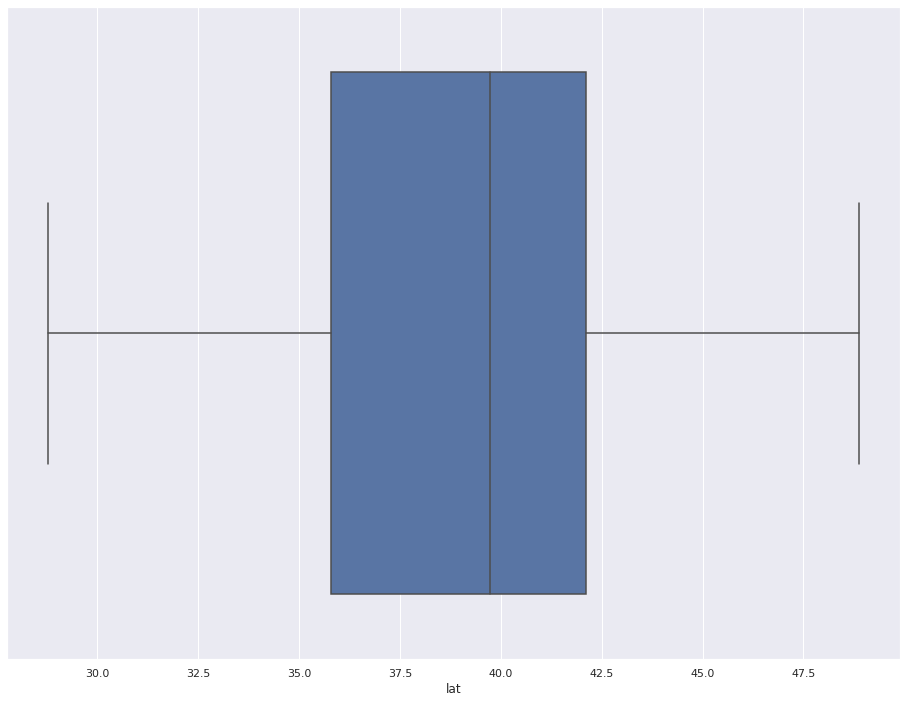

In [71]:
col = 'lat'

sns.boxplot(subsamples[col])

<AxesSubplot:xlabel='merch_lat'>

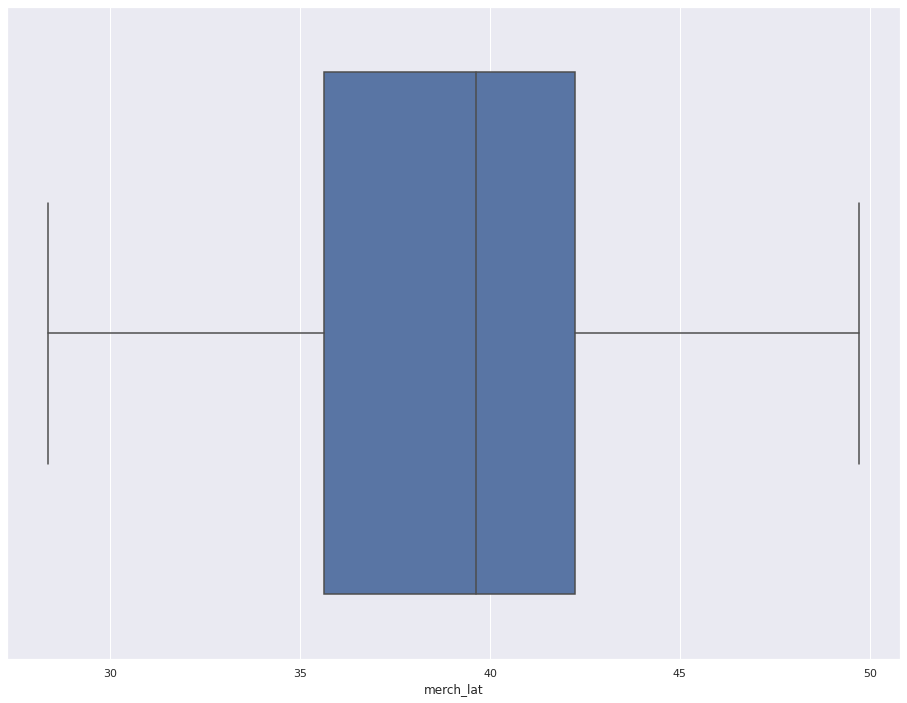

In [72]:
col = 'merch_lat'

sns.boxplot(subsamples[col])


# Step 4

Find one or several theoretical distributions that could describe your sample on a
basis of non-parametric analysis results.

- City population - exponential distribution
- Amount of transaction - lognormal distribution
- Year of birth - normal
- Lattitude of holder - normal
- Lattitude of merchant - normal distribution

# Step 5

Estimate parameters of chosen distributions using methods of maximum likelihood
and least squares method.

In [73]:
X={}
pdf_MaxL={}
pdf_LSq={}
params_MaxL={}
params_LSq={}
cols=['city_pop', 'amt', 'year_of_birth', 'lat', 'merch_lat']
# subsamples = subsamples.dropna().sample(10000)
distributions = {
    'city_pop':stats.expon,
    'amt':stats.johnsonsb,
    'year_of_birth':stats.norm,
    'lat':stats.norm,
    'merch_lat':stats.norm
}

## Maximum likelihood

In [74]:
for col in cols:
    data = subsamples[col].dropna()
    X = np.linspace(np.min(data), np.max(data))
    params = distributions[col].fit(subsamples.dropna()[col])
    print('got params for '+col)
    pdf_MaxL[col] = distributions[col].pdf(X, *params)
    print('got pdf for '+col)
    params_MaxL[col] = params

got params for city_pop
got pdf for city_pop
got params for amt
got pdf for amt
got params for year_of_birth
got pdf for year_of_birth
got params for lat
got pdf for lat
got params for merch_lat
got pdf for merch_lat


### Least squares
From scipy documentation:
```
With method="MM", the fit is computed by minimizing the L2 norm of the relative errors between the first k raw (about zero) data moments and the corresponding distribution moments, where k is the number of non-fixed parameters. More precisely, the objective function is:

(((data_moments - dist_moments)
  / np.maximum(np.abs(data_moments), 1e-8))**2).sum()
```
Thus, it minimizes the sum of squares

In [98]:
for col in cols:
    data = subsamples[col]
    X = np.linspace(np.min(data), np.max(data))
    try:
        params = distributions[col].fit(subsamples[col], floc=subsamples[col].mean(), method="MM")
    except:
        print('No MM for '+col)
        params = distributions[col].fit(subsamples.dropna()[col])
    print('got params for '+col)
    pdf_LSq[col] = distributions[col].pdf(X, *params)
    print('got pdf for '+col)
    params_LSq[col]=params

got params for city_pop
got pdf for city_pop
No MM for amt
got params for amt
got pdf for amt
got params for year_of_birth
got pdf for year_of_birth
got params for lat
got pdf for lat
got params for merch_lat
got pdf for merch_lat


In [95]:
# subsamples.dropna()[col]

In [96]:
pd.DataFrame(pdf_MaxL).to_csv('pdf_MaxL.csv')
pd.DataFrame(pdf_LSq).to_csv('pdf_LSq.csv')

#### Plotting

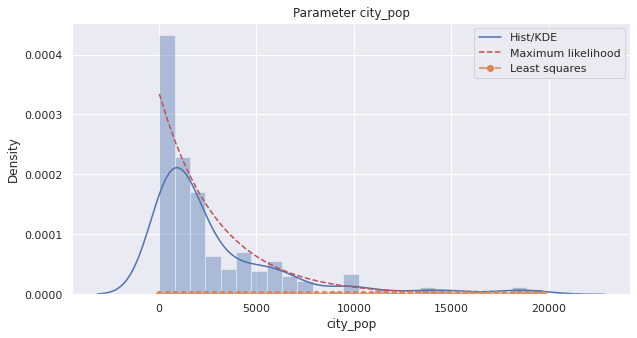

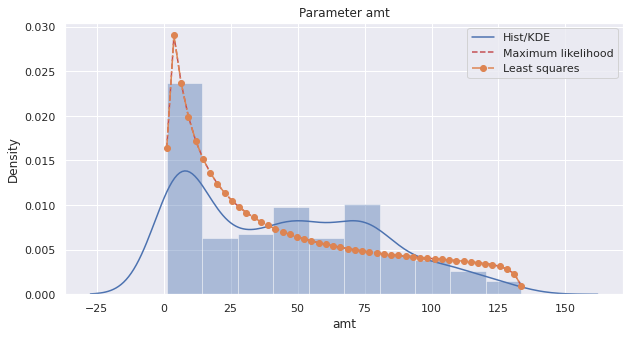

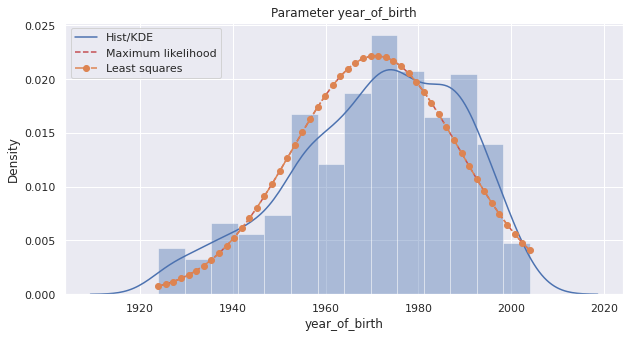

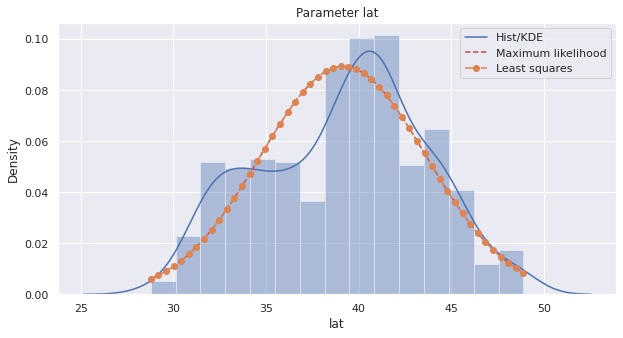

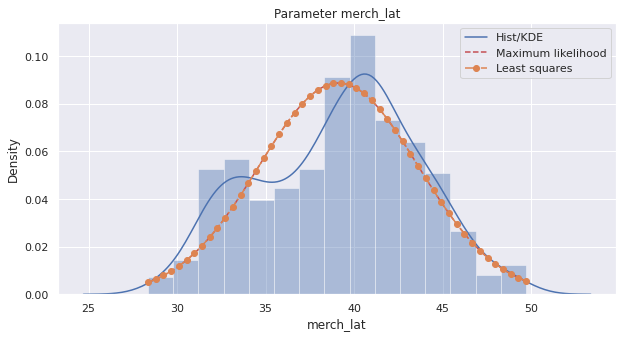

In [97]:
for col in cols:
    plt.figure(figsize=(10, 5))
    sns.distplot(subsamples[col])
    data = subsamples[col].dropna()
    X = np.linspace(np.min(data), np.max(data))
    plt.plot(X, pdf_MaxL[col], 'r--')
    plt.plot(X, pdf_LSq[col], 'o-.')
    plt.legend(['Hist/KDE', 'Maximum likelihood', 'Least squares'])
    plt.title("Parameter " + col)
    plt.show()

# Step 6

Validate your estimated parameters using QQ biplots.

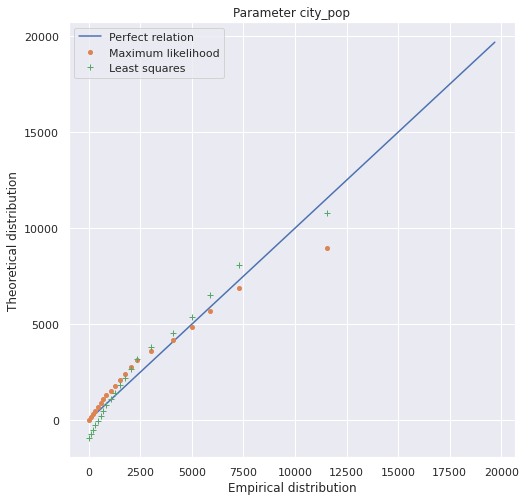

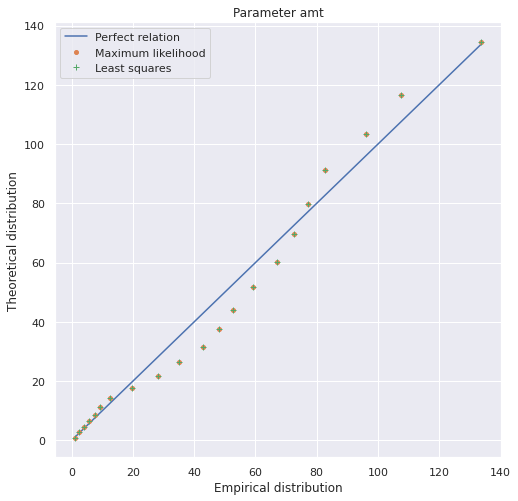

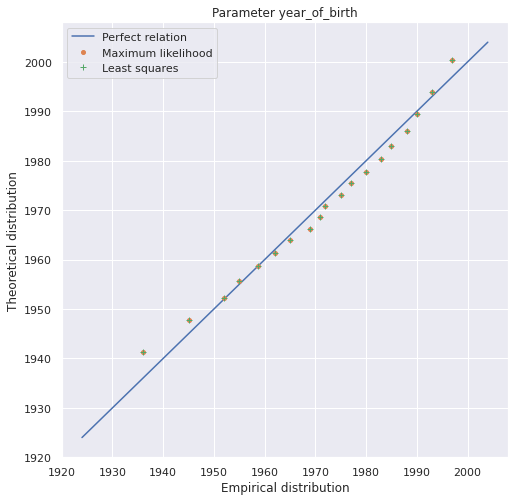

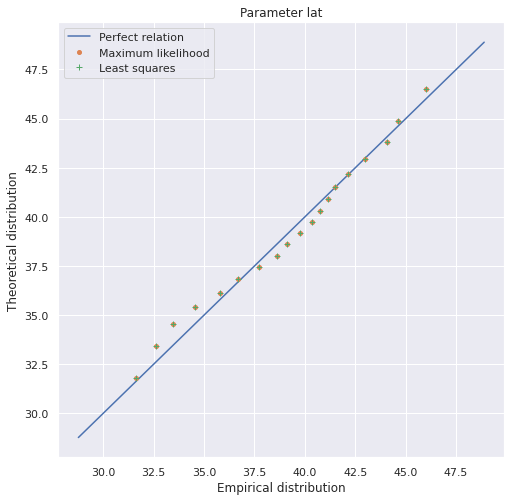

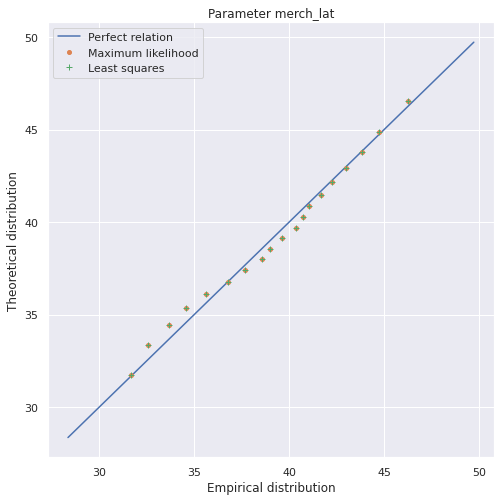

In [79]:
for col in cols:
    percs = np.linspace(0, 100, 21)
    data = subsamples[col].dropna()
    qn_real = np.percentile(data, percs)

    left_border = np.min(data)
    right_border = np.max(data)

    # Building a quantile biplot
    plt.figure(figsize=(8, 8))
    plt.plot(np.linspace(left_border, right_border, 3), np.linspace(left_border, right_border, 3))
    params1 = params_MaxL[col]
    qn_estimation = distributions[col].ppf(percs / 100.0, *params1)
    plt.plot(qn_real, qn_estimation, ls="", marker="o", markersize=4)
    params2 = params_LSq[col]
    qn_estimation = distributions[col].ppf(percs / 100.0, *params2)
    plt.plot(qn_real, qn_estimation, ls="", marker="+", markersize=6)

    plt.legend(['Perfect relation', 'Maximum likelihood', 'Least squares'])
    plt.title("Parameter " + col)

    plt.xlabel(f'Empirical distribution')
    plt.ylabel('Theoretical distribution')

    plt.show()

# Step 7

Estimate correctness of fitted distributions using at least 2 statistical tests.
We will use a small hack to use pearson test: we will create a subsample with same theoretical distribution using .rvs() function.

In [82]:
for col in cols:
    print('Parameter '+col+':')
    for (params, method) in [(params_MaxL[col], 'Maximum likelihood'), (params_LSq[col], 'Least squares')]:
        print('\t'+method)
        data_real = subsamples[col]
        data_hack = distributions[col].rvs(*params, size=1000)
    
        stat, p = stats.mannwhitneyu(data_real, data_hack)
        to_print = '\t\tMann-Whitney U Test: stat=%.3f, p=%.3f' % (stat, p)
        if p > 0.05:
            print(to_print+'\n\t\t\tProbably the same distribution')
        else:
            print(to_print+'\n\t\t\tProbably different distributions')

        stat, p = stats.kruskal(data_real, data_hack)
    #     print('stat=%.3f, p=%.3f' % (stat, p))
        to_print = '\t\tKruskal-Wallis H Test: stat=%.3f, p=%.3f' % (stat, p)
        if p > 0.05:
            print(to_print+'\n\t\t\tProbably the same distribution')
        else:
            print(to_print+'\n\t\t\tProbably different distributions')
    
    
    

Parameter city_pop:
	Maximum likelihood
		Mann-Whitney U Test: stat=300725.000, p=0.000
			Probably different distributions
		Kruskal-Wallis H Test: stat=20.996, p=0.000
			Probably different distributions
	Least squares
		Mann-Whitney U Test: stat=351534.000, p=0.575
			Probably the same distribution
		Kruskal-Wallis H Test: stat=0.314, p=0.575
			Probably the same distribution
Parameter amt:
	Maximum likelihood
		Mann-Whitney U Test: stat=354401.000, p=0.395
			Probably the same distribution
		Kruskal-Wallis H Test: stat=0.723, p=0.395
			Probably the same distribution
	Least squares
		Mann-Whitney U Test: stat=369760.000, p=0.016
			Probably different distributions
		Kruskal-Wallis H Test: stat=5.782, p=0.016
			Probably different distributions
Parameter year_of_birth:
	Maximum likelihood
		Mann-Whitney U Test: stat=367008.000, p=0.033
			Probably different distributions
		Kruskal-Wallis H Test: stat=4.521, p=0.033
			Probably different distributions
	Least squares
		Mann-Whitney U 

  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51 / 104: 

Text(0, 0.5, 'Frequency')

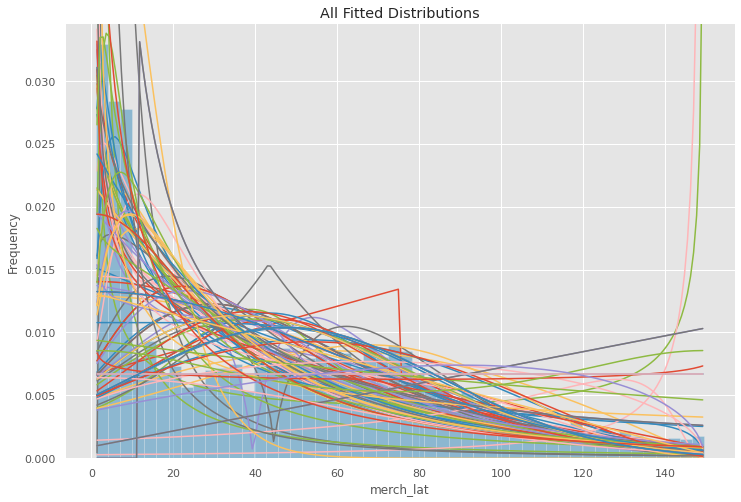

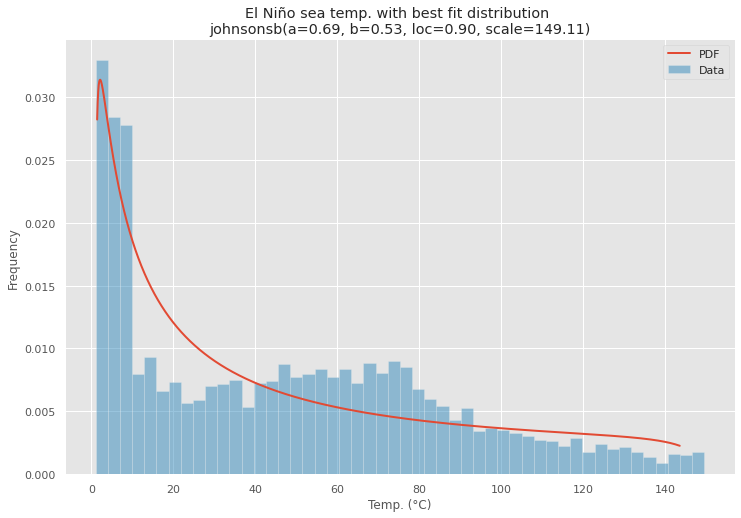

In [49]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = subsamples['amt']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All Fitted Distributions')
ax.set_xlabel(col)
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_ylabel('Frequency')